# Caltech AI & Machine Learning Bootcamp

#### Curse: CB-AIML-Core - Machine Learning
#### CB AIML JAN 2024 COHORT 2
#### Student: Eric Michel

# Course-End Project 1: Employee Turnover Prediction.

## Project Statement:
Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. 
It periodically evaluates employees' work details, including the number of projects they worked on, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level.

Data from prior evaluations show the employees’ satisfaction at the workplace.  
The data could be used to identify patterns in work style and their interest in continuing to work in the company. 

The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain time period.


As the ML Developer assigned to the HR Department, you have been asked to create ML Programs to
1.    Perform data quality checks by checking for missing values if any.
2.    Understand what factors contributed most to employee turnover by EDA.
3.    Perform clustering of Employees who left based on their satisfaction and evaluation.
4.    Handle the left Class Imbalance using the SMOTE technique.
5.    Perform k-fold cross-validation model training and evaluate performance. 
6.    Identify the best model and justify the evaluation metrics used. 
7.    Suggest various retention strategies for targeted employees.

## Data Description

satisfaction_level - Satisfaction level at the job of an employee
last_evaluation - Rating between 0 to 1, received by an employee at his last evaluation
number_project - Number of projects an employee is involved in
average_montly_hours - Average number of hours in a month spent by an employee at the office
time_spend_company - Number of years spent in the company
Work_accident
    0 - no accident during employee stay, 
    1 - accident during employee stay
left
    0 indicates employee stays in the company, 
    1 indicates employee left the company
promotion_last_5years - Number of promotions in his stay
Department - Department which an employee belongs to
salary - Salary in USD

## Sumary: What I did in this project


1.  Perform data quality checks by checking for missing values if any.
2.  Understand what factors contributed most to employee turnover by EDA.
    2.1 Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data
    2.2 Draw the distribution plot of 
        Employee Satisfaction (use column satisfaction_level)
        Employee Evaluation (use column last_evaluation)
        Employee Average Monthly Hours (use column average_montly_hours)
    2.3 Draw the bar plot of the Employee Project Count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot.
3.  Perform clustering of employees who left based on their satisfaction and evaluation
    3.1 Choose columns satisfaction_level, last_evaluation and left
    3.2 Do K-Means clustering of employees who left the company into 3 clusters?
    3.3 Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters

4.  Handle the left Class Imbalance using the SMOTE technique
    4.1 Pre-process the data by converting categorical columns to numerical columns by
        -   Separating categorical variables and numeric variables.
        -   Applying get_dummies() to the categorical variables.
        -   Combining categorical variables and numeric variables.
    4.2 Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123
    4.3 Upsample the train dataset using the SMOTE technique from the imblearn module

5.  Perform k-fold (5-fold) cross-validation model training and evaluate performance
    5.1 Train a Logistic Regression model, apply a 5-fold CV, and plot the classification report
    5.2 Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report
    5.3 Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report

6.  Identify the best model and justify the evaluation metrics used
    6.1 Find the ROC/AUC for each model and plot the ROC curve
    6.2 Find the confusion matrix for each of the models
    6.3 Explain which metric needs to be used from the confusion matrix - Recall or Precision?

7.  Suggest various retention strategies for targeted employees
    7.1 Using the best model, predict the probability of employee turnover in the test data
    7.2 Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone:
        -   Safe Zone (Green) (Score < 20%)
        -   Low Risk Zone (Yellow) (20% < Score < 60%)
        -   Medium Risk Zone (Orange) (60% < Score < 90%)
        -   High Risk Zone (Red) (Score > 90%).
    

In [787]:
# !pip install openpyxl
# !pip install imblearn

In [788]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error, mean_absolute_error, roc_curve, roc_auc_score


from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler



#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [789]:
df =  pd.read_excel('./1688640705_hr_comma_sep.xlsx', engine='openpyxl')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [790]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [791]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# 1.  Perform data quality checks by checking for missing values if any.

In [792]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [793]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

# 2.  Understand what factors contributed most to employee turnover by EDA.

2.1 Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data

In [794]:
df_categorical = df.select_dtypes(include='object')
df_categorical

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [795]:
df['sales'].value_counts().reset_index()

,sales,count
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


In [796]:
# Convert categorical values to numerical using pd.factorize()
df['sales_numerical'], _ = pd.factorize(df['sales'])
df['salary_numerical'], _ = pd.factorize(df['salary'])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales_numerical,salary_numerical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0


In [797]:
df['sales_numerical'].value_counts().reset_index()

,sales_numerical,count
0,0,4140
1,3,2720
2,4,2229
3,6,1227
4,7,902
5,8,858
6,9,787
7,1,767
8,2,739
9,5,630


In [798]:
df['salary_numerical'].value_counts().reset_index()

,salary_numerical,count
0,0,7316
1,1,6446
2,2,1237


In [799]:
df_numeric = df.select_dtypes(include='number')
df_numeric

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_numerical,salary_numerical
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,4,0
14995,0.37,0.48,2,160,3,0,1,0,4,0
14996,0.37,0.53,2,143,3,0,1,0,4,0
14997,0.11,0.96,6,280,4,0,1,0,4,0


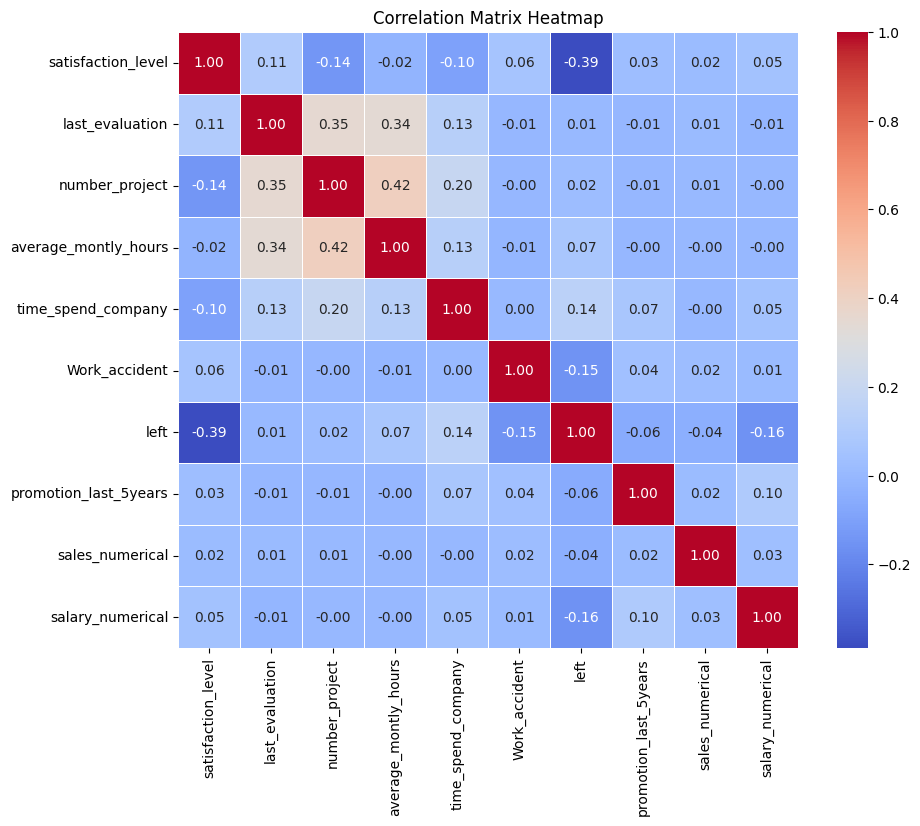

In [800]:
# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 2.2 Draw the distribution plot of 
Employee Satisfaction (use column satisfaction_level)
Employee Evaluation (use column last_evaluation)
Employee Average Monthly Hours (use column average_montly_hours)

In [801]:
target_cols = df_numeric[['satisfaction_level','last_evaluation','average_montly_hours']]

<Figure size 1500x1000 with 0 Axes>

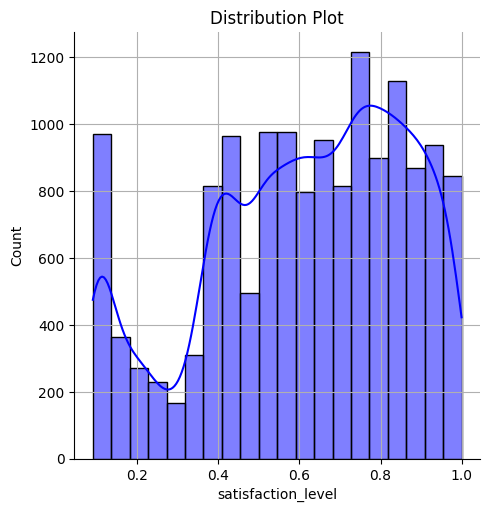

<Figure size 1500x1000 with 0 Axes>

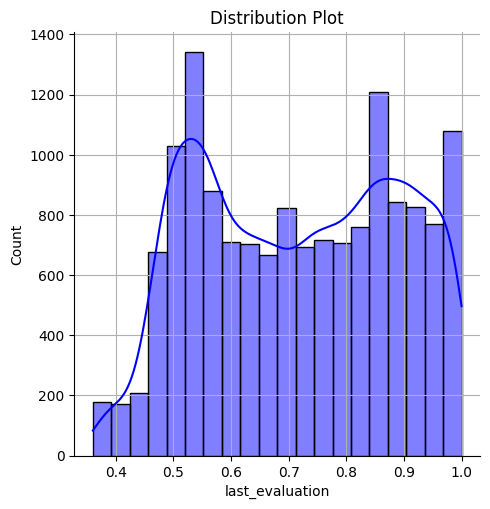

<Figure size 1500x1000 with 0 Axes>

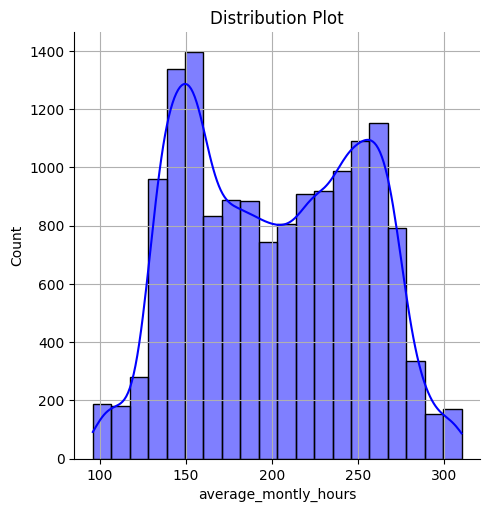

In [802]:
# Draw the distribution plot 

for column in target_cols.columns:
    plt.figure(figsize=(15, 10))
    sns.displot(df[column], kde=True, bins=20, color='blue')
    plt.title('Distribution Plot')
    plt.grid(True)
    plt.show()

2.3 Draw the bar plot of the Employee Project Count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot.

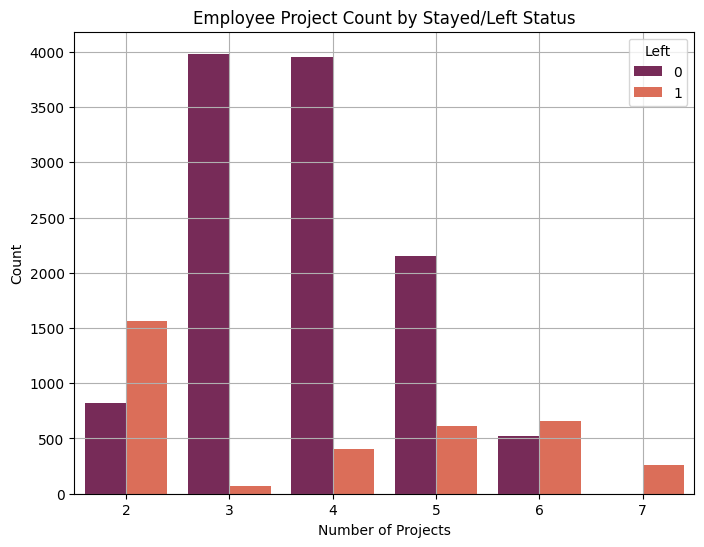

In [803]:
# Draw the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='number_project', hue='left', data=df, palette='rocket')
plt.title('Employee Project Count by Stayed/Left Status')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend(title='Left')
plt.grid(True)
plt.show()

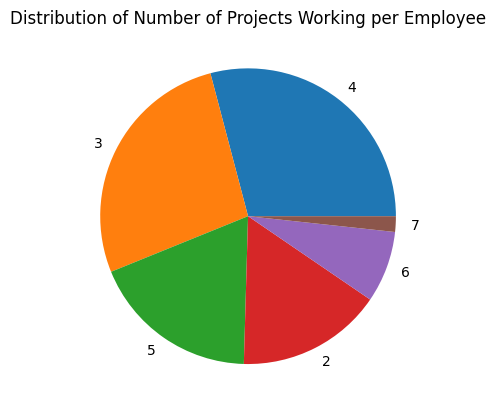

In [804]:
number_projects = df['number_project'].value_counts()
plt.pie(number_projects.values, labels=number_projects.index)
plt.title('Distribution of Number of Projects Working per Employee')
plt.show()

## 3.  Perform clustering of employees who left based on their satisfaction and evaluation
    3.1 Choose columns satisfaction_level, last_evaluation and left

In [805]:
satisf_eval = df[['satisfaction_level','last_evaluation', 'left']]
satisf_eval

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


    3.2 Do K-Means clustering of employees who left the company into 3 clusters

In [806]:
# Get employees who left the company
employees_left = satisf_eval[satisf_eval['left']==1].reset_index()
del employees_left['index']
employees_left


,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
3566,0.40,0.57,1
3567,0.37,0.48,1
3568,0.37,0.53,1
3569,0.11,0.96,1


Plot data

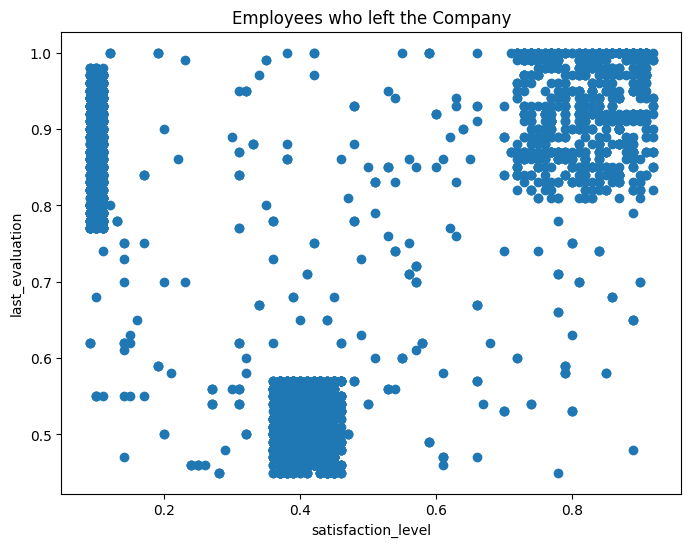

In [807]:
plt.figure(figsize=(8,6))
plt.scatter(x=employees_left['satisfaction_level'], y=employees_left['last_evaluation'])
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.title('Employees who left the Company')
plt.show()

In [808]:
#Create a model (we set to 3 clusters, expecting the model will identify 3 groups)
# The model will give us 3 groups of employees based on satisfaction_level and last_evaluation
# to identify why they left

k=3

kmeans_model = KMeans(n_clusters=k, random_state=42)
# kmeans = KMeans(n_clusters=5, random_state=0)
# df['cluster'] = kmeans_model.fit_predict(X)
labels = kmeans_model.fit_predict(employees_left)
labels

array([0, 1, 2, ..., 0, 2, 0], dtype=int32)

In [809]:
centroids = kmeans_model.cluster_centers_
centroids

array([[0.41014545, 0.51698182, 1.        ],
       [0.80851586, 0.91170931, 1.        ],
       [0.11115466, 0.86930085, 1.        ]])

In [810]:
labels.shape

(3571,)

In [811]:
employees_left['cluster'] = pd.DataFrame(kmeans_model.labels_)
employees_left

,satisfaction_level,last_evaluation,left,cluster
0,0.38,0.53,1,0
1,0.80,0.86,1,1
2,0.11,0.88,1,2
3,0.72,0.87,1,1
4,0.37,0.52,1,0
...,...,...,...,...
3566,0.40,0.57,1,0
3567,0.37,0.48,1,0
3568,0.37,0.53,1,0
3569,0.11,0.96,1,2


In [812]:
# We extract satisfaction_level and last_evaluation
emp_left = employees_left.iloc[:, [0, 1]].values
emp_left #get our features

array([[0.38, 0.53],
       [0.8 , 0.86],
       [0.11, 0.88],
       ...,
       [0.37, 0.53],
       [0.11, 0.96],
       [0.37, 0.52]])

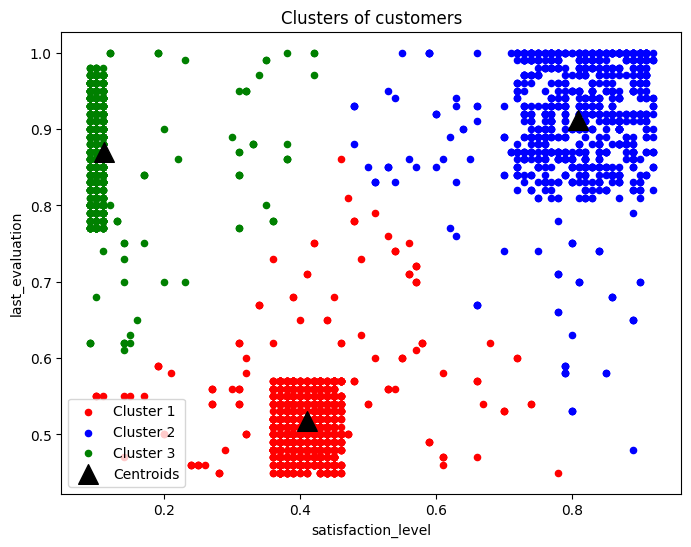

In [813]:
plt.figure(figsize=(8,6))


plt.scatter(emp_left[labels == 0, 0], emp_left[labels == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(emp_left[labels == 1, 0], emp_left[labels == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(emp_left[labels == 2, 0], emp_left[labels == 2, 1], s = 20, c = 'green', label = 'Cluster 3')

plt.scatter(centroids[:, 0], centroids[:, 1],  marker='^', s = 200, c = 'black', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.legend()
plt.show()

In [814]:
num_people_group = employees_left['cluster'].value_counts()
num_people_group

cluster
0    1650
1     977
2     944
Name: count, dtype: int64

    3.3 Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters

In [815]:
num_survees = len(df['left'])
left_percent = 100*(len(employees_left)/num_survees)
left_percent

23.80825388359224

    We are looking at the distribution of employees who left the company. Overall 23.8% of employees who took the survey left the company. The cluster distribution figure above shows the relationship between last evaluation score received by the employee and their satisfaction level they had at their job.

    The cluster 1 is the largest group with 1650 people having the low level at both. This can suggest that those employees were probably not a good fit to the company.

    The cluster 2 shows 977 people who have high evaluation results and high satisfaction suggesting they were probably looking for a different carrer path or different environtment but nothing much the company can do to keep them.

    The cluster 3 shows 944 people who received a high evaluation but they feel very low satisfaction with the company this is the group where the company missed the chance to retaining good talent.

    To do a better job at retaining talent let's observe the survey results of employees who stayed at the company.

In [816]:
# Get employees who left the company
employees_stay = satisf_eval[satisf_eval['left']==0].reset_index()
del employees_stay['index']
employees_stay

,satisfaction_level,last_evaluation,left
0,0.58,0.74,0
1,0.82,0.67,0
2,0.45,0.69,0
3,0.78,0.82,0
4,0.49,0.60,0
...,...,...,...
11423,0.90,0.55,0
11424,0.74,0.95,0
11425,0.85,0.54,0
11426,0.33,0.65,0


In [817]:
# We extract satisfaction_level and last_evaluation
Z = employees_stay.iloc[:, [0, 1]].values
Z #get our features

array([[0.58, 0.74],
       [0.82, 0.67],
       [0.45, 0.69],
       ...,
       [0.85, 0.54],
       [0.33, 0.65],
       [0.5 , 0.73]])

Text(0, 0.5, 'last_evaluation')

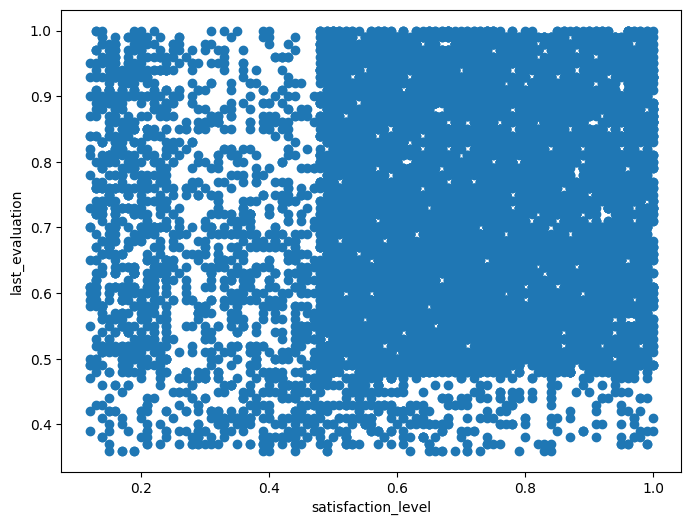

In [818]:
plt.figure(figsize=(8,6))
plt.scatter(x=Z[:,0], y=Z[:,1])
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')

# 4.  Handle the 'Left' Class Imbalance using the SMOTE technique

### 4.1 Pre-process the data by converting categorical columns to numerical columns

We have previously separated the columns into numeric and categorical data

In [819]:
#numeric columns
df_numeric

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_numerical,salary_numerical
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,4,0
14995,0.37,0.48,2,160,3,0,1,0,4,0
14996,0.37,0.53,2,143,3,0,1,0,4,0
14997,0.11,0.96,6,280,4,0,1,0,4,0


In [820]:
#categorical columns
df_categorical

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


Convert categorical data into numerical columns using get_dummies()

### Perform One Hot Encoding

In [821]:
# One-Hot Encoding
# Dummy encoding, dropping first for a more condensed representation
dummy_categories = pd.get_dummies(df_categorical, drop_first=True)
# dummy_categories = pd.get_dummies(df_categorical)
dummy_categories.head()


,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,False,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,True,False,False,True,False
4,False,False,False,False,False,False,True,False,False,True,False


Question: Do we need to drop first columns?

### Combining categorical variables and numeric variables.

In [822]:
df_final = pd.concat([dummy_categories,df_numeric], axis=1)
df_final.head()

,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,...,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_numerical,salary_numerical
0,False,False,False,False,False,False,True,False,False,True,...,0.38,0.53,2,157,3,0,1,0,0,0
1,False,False,False,False,False,False,True,False,False,False,...,0.80,0.86,5,262,6,0,1,0,0,1
2,False,False,False,False,False,False,True,False,False,False,...,0.11,0.88,7,272,4,0,1,0,0,1
3,False,False,False,False,False,False,True,False,False,True,...,0.72,0.87,5,223,5,0,1,0,0,0
4,False,False,False,False,False,False,True,False,False,True,...,0.37,0.52,2,159,3,0,1,0,0,0


In [823]:
# Remove the feature we want to predict
X = df_final.drop(['left'], axis=1)
X

,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_numerical,salary_numerical
0,False,False,False,False,False,False,True,False,False,True,False,0.38,0.53,2,157,3,0,0,0,0
1,False,False,False,False,False,False,True,False,False,False,True,0.80,0.86,5,262,6,0,0,0,1
2,False,False,False,False,False,False,True,False,False,False,True,0.11,0.88,7,272,4,0,0,0,1
3,False,False,False,False,False,False,True,False,False,True,False,0.72,0.87,5,223,5,0,0,0,0
4,False,False,False,False,False,False,True,False,False,True,False,0.37,0.52,2,159,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,True,False,True,False,0.40,0.57,2,151,3,0,0,4,0
14995,False,False,False,False,False,False,False,True,False,True,False,0.37,0.48,2,160,3,0,0,4,0
14996,False,False,False,False,False,False,False,True,False,True,False,0.37,0.53,2,143,3,0,0,4,0
14997,False,False,False,False,False,False,False,True,False,True,False,0.11,0.96,6,280,4,0,0,4,0


In [824]:
y = df_final['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [825]:
y.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

We can see the unbalance in the data for the employees who left (3571) compared to the 11428 people who stayed.

## Split Data for trainin and testing the model predictions

### 4.2 Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123

In [826]:
# # Standardize features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [827]:
#Test data 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)
X_train.head()
# X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=123)
# X_train



,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_numerical,salary_numerical
3553,False,False,False,False,False,False,False,False,True,True,False,0.31,0.64,6,183,2,1,0,3,0
2112,False,False,False,False,False,False,False,True,False,True,False,0.59,0.81,4,200,2,0,0,4,0
1794,False,False,False,False,False,False,False,False,True,True,False,0.38,0.51,2,159,3,0,0,3,0
13885,False,False,False,False,False,False,True,False,False,False,True,0.95,0.77,5,199,10,1,0,0,1
11250,False,False,False,False,False,False,False,False,False,False,True,0.50,0.77,3,265,3,0,0,6,1


In [828]:
X_train.shape

(11999, 20)

### 4.3 Upsample the train dataset using the SMOTE technique from the imblearn module

Do data Scaling first

In [829]:
# for col in df.columns:
for col in X_train.columns:
    scaler = StandardScaler()
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1,1))
    X_test[col] = scaler.fit_transform(X_test[col].values.reshape(-1,1))

    
X_train.head()

,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_numerical,salary_numerical
3553,-0.233026,-0.22862,-0.226594,-0.216027,-0.246629,-0.252096,-0.618879,-0.419143,2.128859,1.025066,-0.870391,-1.218676,-0.438110,1.781011,-0.365548,-1.018000,2.442134,-0.147059,-0.119994,-0.934207
2112,-0.233026,-0.22862,-0.226594,-0.216027,-0.246629,-0.252096,-0.618879,2.385820,-0.469735,1.025066,-0.870391,-0.093192,0.553150,0.161063,-0.023885,-1.018000,-0.409478,-0.147059,0.235164,-0.934207
1794,-0.233026,-0.22862,-0.226594,-0.216027,-0.246629,-0.252096,-0.618879,-0.419143,2.128859,1.025066,-0.870391,-0.937305,-1.196132,-1.458885,-0.847895,-0.341794,-0.409478,-0.147059,-0.119994,-0.934207
13885,-0.233026,-0.22862,-0.226594,-0.216027,-0.246629,-0.252096,1.615826,-0.419143,-0.469735,-0.975547,1.148909,1.353859,0.319912,0.971037,-0.043983,4.391648,2.442134,-0.147059,-1.185470,0.639284
11250,-0.233026,-0.22862,-0.226594,-0.216027,-0.246629,-0.252096,-0.618879,-0.419143,-0.469735,-0.975547,1.148909,-0.454955,0.319912,-0.648911,1.282473,-0.341794,-0.409478,-0.147059,0.945481,0.639284


Question: Should I perform standarization in the test data as well?

In [830]:
# feature_names = list(X_train.columns)
# feature_names

In [831]:
# Create a SMOTE oversampler
oversampler = SMOTE()

X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

print(f'old label count: {df.left.value_counts()}')
print(f'new label count: {y_train_oversampled.value_counts()}')


old label count: left
0    11428
1     3571
Name: count, dtype: int64
new label count: left
0    9137
1    9137
Name: count, dtype: int64


#### Now we have a balanced dataset of 9137 employees for each group of people who left and who stayed in the company

# 5.  Perform k-fold (5-fold) cross-validation model training and evaluate performance

### 5.1 Train a Logistic Regression model, apply a 5-fold CV, and plot the classification report

In [832]:
#Get random splits (5-fold)
kfold = KFold(n_splits=5, random_state=7, shuffle=True)

In [833]:
# https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

# The solvers implemented in the class LogisticRegression are “lbfgs”, “liblinear”, “newton-cg”, “newton-cholesky”, “sag” and “saga”:


logistic_reg = LogisticRegression(solver="lbfgs", random_state=42)
# logistic_reg.fit(X_train, y_train)
logistic_reg.fit(X_train_oversampled, y_train_oversampled)

LogisticRegression(random_state=42)

In [834]:
#Model predictions
lr_preds = logistic_reg.predict(X_test)

In [835]:
#test the model using cross validation
results =  cross_val_score(logistic_reg, X_test,y_test, cv=kfold)
print("Logistic Regression Cross Validation Score:")
print(results.mean())

Logistic Regression Cross Validation Score:
0.7809999999999999


__Observations:__
- The mean cross-validation score is 0.7746.
- We have an accuracy of 77%.

In [836]:
report = classification_report(y_test, lr_preds, zero_division=1)
print("Logistic Regression Classification Report:")
print(report)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.83      2291
           1       0.49      0.81      0.61       709

    accuracy                           0.76      3000
   macro avg       0.71      0.78      0.72      3000
weighted avg       0.82      0.76      0.78      3000



### 5.2 Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report

In [837]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# random_forest_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train_oversampled, y_train_oversampled)

RandomForestClassifier(random_state=42)

In [838]:
#Model predictions
rf_preds = random_forest_classifier.predict(X_test)

In [839]:
#test the model using cross validation
results =  cross_val_score(random_forest_classifier, X_test,y_test, cv=kfold)
print("Random Forest Cross Validation Score:")
print(results.mean())

Random Forest Cross Validation Score:
0.9776666666666667


In [840]:
report = classification_report(y_test, rf_preds, zero_division=1)
print("Random Forest Classification Report:")
print(report)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2291
           1       0.93      0.98      0.95       709

    accuracy                           0.98      3000
   macro avg       0.96      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000



### 5.3 Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report

In [841]:
# Create a GradientBoostingClassifier object with a learning rate of 0.1
# variation of gradient descent optimization (or stockastic gradient descent)

gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [842]:
# gradient_booster.fit(X_train,y_train)
gradient_booster.fit(X_train_oversampled, y_train_oversampled)

GradientBoostingClassifier()

In [843]:
#Model predictions
gb_preds = gradient_booster.predict(X_test)

In [844]:
#test the model using cross validation
results =  cross_val_score(gradient_booster, X_test,y_test, cv=kfold)
print("Random Forest Cross Validation Score:")
print(results.mean())

Random Forest Cross Validation Score:
0.9719999999999999


In [845]:
report = classification_report(y_test, gb_preds, zero_division=1)
print("Random Forest Classification Report:")
print(report)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2291
           1       0.64      0.96      0.77       709

    accuracy                           0.86      3000
   macro avg       0.81      0.90      0.84      3000
weighted avg       0.90      0.86      0.87      3000



# 6.  Identify the best model and justify the evaluation metrics used

### Evaluate Accuracy of All models

In [846]:
def print_metrics(title,model_preds):
    print(title)
    print('Accuracy: ', accuracy_score(y_test, model_preds))
    print('F1 score: ', f1_score(y_test, model_preds))
    print('r2 score: ', r2_score(y_test, model_preds))
    print('MSE score: ', mean_squared_error(y_test, model_preds))
    print('RMSE score: ', np.sqrt(mean_squared_error(y_test, model_preds)))
    print('MAE score: ', mean_absolute_error(y_test, model_preds))
    

In [847]:
print_metrics('Logistic Regression', lr_preds)
print_metrics('Random Forest', rf_preds)
print_metrics('Gradient Boosting', gb_preds)

Logistic Regression
Accuracy:  0.7593333333333333
F1 score:  0.6134903640256959
r2 score:  -0.33348190841823566
MSE score:  0.24066666666666667
RMSE score:  0.49057789051960615
MAE score:  0.24066666666666667
Random Forest
Accuracy:  0.9773333333333334
F1 score:  0.953232462173315
r2 score:  0.8744089061323546
MSE score:  0.02266666666666667
RMSE score:  0.1505545305418162
MAE score:  0.02266666666666667
Gradient Boosting
Accuracy:  0.8633333333333333
F1 score:  0.768361581920904
r2 score:  0.2427595810921377
MSE score:  0.13666666666666666
RMSE score:  0.3696845502136472
MAE score:  0.13666666666666666


### 6.1 Find the ROC/AUC for each model and plot the ROC curve

In [848]:
# Compute ROC Curve
# ROC = Receiver Operating Characteristic
def compute_roc(title, model):
    proba = model.predict_proba(X_test)
    proba_class1 = proba[:, 1]  # Probability of positive class
    fpr, tpr, thresholds = roc_curve(y_test, proba_class1)
    roc_auc = roc_auc_score(y_test, proba_class1)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{title} Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

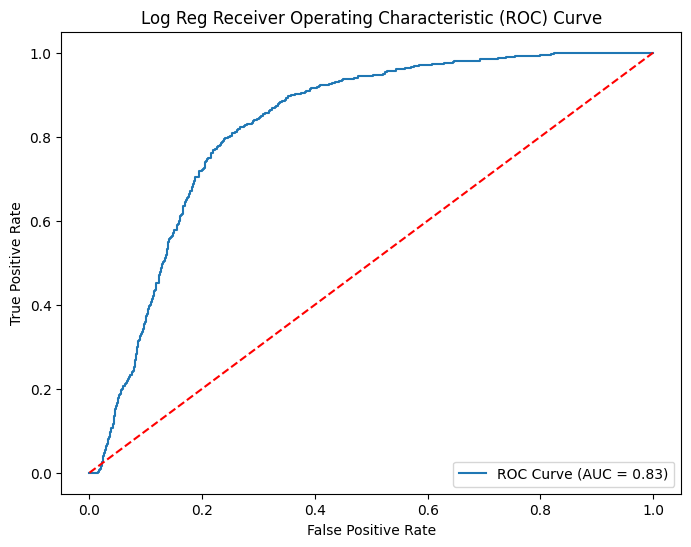

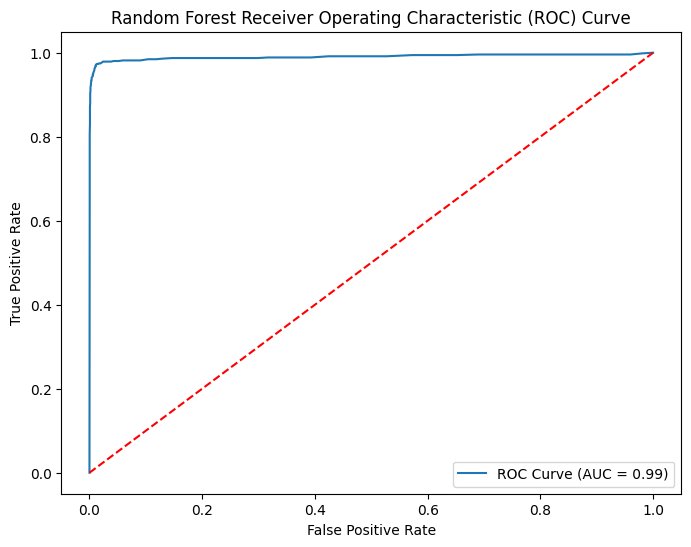

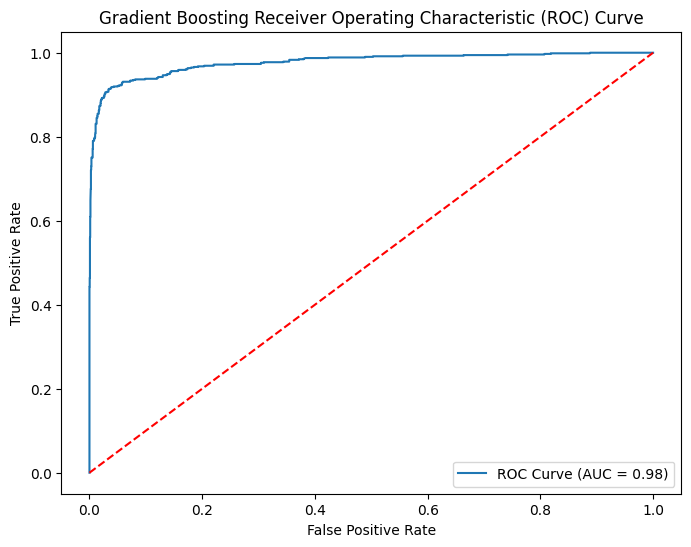

In [849]:
compute_roc('Log Reg', logistic_reg)
compute_roc('Random Forest', random_forest_classifier)
compute_roc('Gradient Boosting', gradient_booster)

###  6.2 Find the confusion matrix for each of the models

In [850]:
#Print and Calculate confusion matrix
def confussion_mat_plot(title, model,y_pred):
    confusion_mat = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.title(title)
    plt.show()

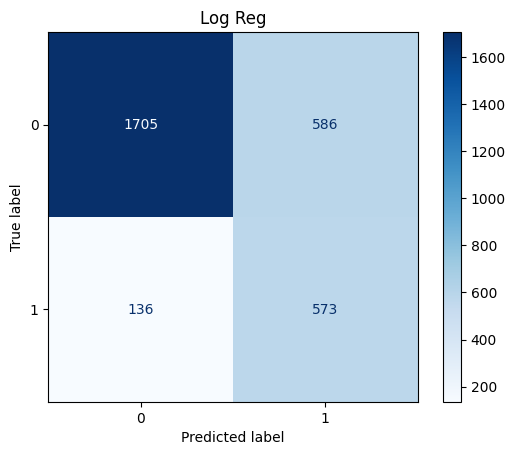

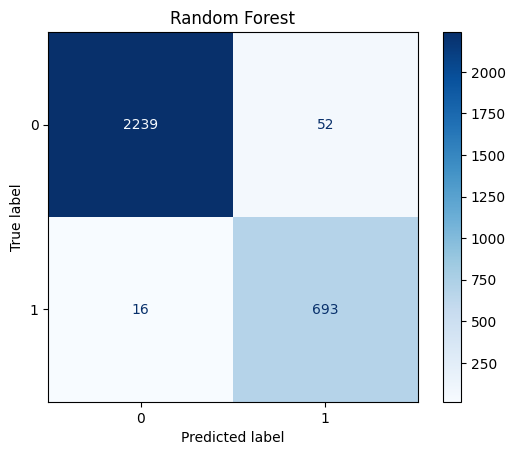

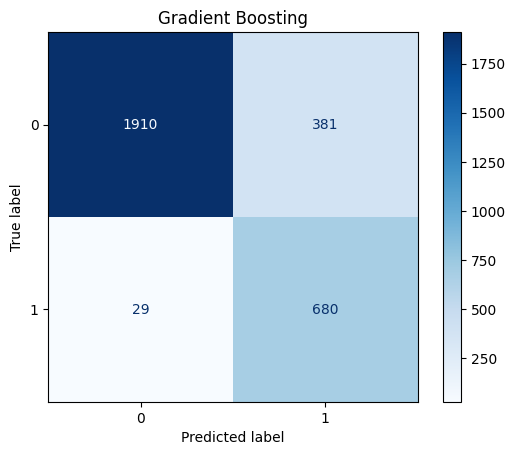

In [851]:
confussion_mat_plot('Log Reg', logistic_reg, lr_preds)
confussion_mat_plot('Random Forest', random_forest_classifier, rf_preds)
confussion_mat_plot('Gradient Boosting', gradient_booster, gb_preds)

### 6.3 Explain which metric needs to be used from the confusion matrix - Recall or Precision?

- Recall (also called Sensitivity) - measures the proportion of actual positive cases that were correctly identified by the model.
- Recall=TP/(TP+FN)
- It's useful when the cost of missing positive cases (false negatives) is high. For example, in medical diagnosis, you want high recall to ensure that you catch as many positive cases of a disease as possible, even if it means some false positives.
- It is useful when you want a model that don't miss out to select the things you are interested on, even if catches a few others that are not correct.
    
    ===
- Precision (or Specificity) measures the proportion of positive identifications that were actually correct.
- Precision=TP/(TP+FP)
- Precision tells us how good our model is at selecting the things we want, without mistakenly choosing others we don't want.
- Precision is important when the cost of false positives is high.
- Useful when you expect FP to be as low as possible.
- Means that we need to choose a model that gives us the lowest number in the false positives in a confusion matrix.
- For instance, in spam detection, you want high precision to ensure that emails classified as spam are indeed spam, even if it means some spam emails are missed.

    - In this case, we want to make sure we choose a model that identifies very well when an employee is about to leave the company and do something about it before its too late. 
    - Than means we want our model not to miss out these individuals, in other words, the cost of false negatives is high. 
    - Therefore, Recall needs to be used as our metric and select the model that gives us the highest Recall value (lowes number of False Negatives).
    - By looking at the confusion matrix the Random Forest model gives us the lowest value, 16, that belongs to the False Negative, so it's expected to give the highest recall.

# 7.  Suggest various retention strategies for targeted employees

###     7.2 Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone:

-   Safe Zone (Green) (Score < 20%)
-   Low Risk Zone (Yellow) (20% < Score < 60%)
-   Medium Risk Zone (Orange) (60% < Score < 90%)
-   High Risk Zone (Red) (Score > 90%).

## Predict the probability of an employee leaving the company

In [852]:
# Get some testing employees to predict the leave risk.
test_employees_df = pd.DataFrame(X_test)
test_employees_df

,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_numerical,salary_numerical
6958,-0.244328,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,1.634616,-0.412367,-0.474331,-0.976933,-0.859141,-0.288049,-0.294338,-0.662167,-0.917663,-1.063063,-0.417885,-0.148817,-1.178328,2.177220
7534,-0.244328,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,-0.611764,2.425022,-0.474331,1.023612,-0.859141,0.437820,-1.177940,-0.662167,-1.134754,0.383937,2.393002,-0.148817,0.229611,-0.930135
2975,4.092857,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,-0.611764,-0.412367,-0.474331,1.023612,-0.859141,1.365320,-0.647779,-0.662167,1.312453,-1.063063,-0.417885,-0.148817,1.989535,-0.930135
3903,-0.244328,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,1.634616,-0.412367,-0.474331,1.023612,-0.859141,0.679777,0.412544,-0.662167,0.049378,-1.063063,-0.417885,-0.148817,-1.178328,-0.930135
8437,-0.244328,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,-0.611764,-0.412367,2.108233,1.023612,-0.859141,-0.046093,-1.884822,-0.662167,-1.075548,0.383937,2.393002,-0.148817,-0.122373,-0.930135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,-0.244328,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,1.634616,-0.412367,-0.474331,1.023612,-0.859141,-0.771962,-1.001220,-1.478985,-1.036076,-0.339563,-0.417885,-0.148817,-1.178328,-0.930135
10593,-0.244328,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,-0.611764,-0.412367,-0.474331,-0.976933,-0.859141,-0.005767,-0.294338,0.154651,-0.976870,-0.339563,-0.417885,-0.148817,0.933581,2.177220
12248,-0.244328,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,1.634616,-0.412367,-0.474331,1.023612,-0.859141,1.042711,1.119426,0.154651,0.542767,1.107438,-0.417885,-0.148817,-1.178328,-0.930135
3147,-0.244328,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,1.634616,-0.412367,-0.474331,-0.976933,1.163954,-0.489680,-0.058710,-0.662167,-0.917663,-1.063063,-0.417885,-0.148817,-1.178328,0.623543


## We can use any predictive model (such as logistic regression, gradient boosting, random forest, SVM, KNN, etc.)


In [853]:
# Predict probability scores for test data

# # Use the previously trained regression model
# probability_scores = logistic_reg.predict_proba(test_employees_df)[:, 1]

# Use the previously trained random forest model
probability_scores = random_forest_classifier.predict_proba(test_employees_df)[:, 1]

The [:, 1] indexing is used to select only the probability estimates for the positive class (class 1).
In binary classification tasks, where there are only two classes (e.g., 0 and 1), the probability estimates returned by predict_proba are of the form [prob_class_0, prob_class_1]. 

In [854]:
probability_scores

array([0.13, 0.31, 0.12, ..., 1.  , 0.16, 0.1 ])

## Categorize employees into different risk zones based on the defined thresholds (Safe Zone, Low Risk Zone, Medium Risk Zone, High Risk Zone).

-   Safe Zone (Green) (Score < 20%)
-   Low Risk Zone (Yellow) (20% < Score < 60%)
-   Medium Risk Zone (Orange) (60% < Score < 90%)
-   High Risk Zone (Red) (Score > 90%).

In [855]:
predicted_zones = []
for score in probability_scores:
    if score < 0.2:
        predicted_zones.append('Green')   # Safe Zone (Green)
    elif score <0.6:
        predicted_zones.append('Yellow')   # Low Risk Zone (Yellow)
    elif score <0.9:
        predicted_zones.append('Orange')   # Medium Risk Zone (Orange)
    else:
        predicted_zones.append('Red')   # High Risk Zone (Red)

test_employees_df['RiskZone'] = predicted_zones
test_employees_df


,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,...,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_numerical,salary_numerical,RiskZone
6958,-0.244328,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,1.634616,-0.412367,-0.474331,-0.976933,...,-0.288049,-0.294338,-0.662167,-0.917663,-1.063063,-0.417885,-0.148817,-1.178328,2.177220,Green
7534,-0.244328,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,-0.611764,2.425022,-0.474331,1.023612,...,0.437820,-1.177940,-0.662167,-1.134754,0.383937,2.393002,-0.148817,0.229611,-0.930135,Yellow
2975,4.092857,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,-0.611764,-0.412367,-0.474331,1.023612,...,1.365320,-0.647779,-0.662167,1.312453,-1.063063,-0.417885,-0.148817,1.989535,-0.930135,Green
3903,-0.244328,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,1.634616,-0.412367,-0.474331,1.023612,...,0.679777,0.412544,-0.662167,0.049378,-1.063063,-0.417885,-0.148817,-1.178328,-0.930135,Green
8437,-0.244328,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,-0.611764,-0.412367,2.108233,1.023612,...,-0.046093,-1.884822,-0.662167,-1.075548,0.383937,2.393002,-0.148817,-0.122373,-0.930135,Yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,-0.244328,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,1.634616,-0.412367,-0.474331,1.023612,...,-0.771962,-1.001220,-1.478985,-1.036076,-0.339563,-0.417885,-0.148817,-1.178328,-0.930135,Red
10593,-0.244328,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,-0.611764,-0.412367,-0.474331,-0.976933,...,-0.005767,-0.294338,0.154651,-0.976870,-0.339563,-0.417885,-0.148817,0.933581,2.177220,Green
12248,-0.244328,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,1.634616,-0.412367,-0.474331,1.023612,...,1.042711,1.119426,0.154651,0.542767,1.107438,-0.417885,-0.148817,-1.178328,-0.930135,Red
3147,-0.244328,-0.245856,-0.231821,-0.180838,-0.245093,-0.256358,1.634616,-0.412367,-0.474331,-0.976933,...,-0.489680,-0.058710,-0.662167,-0.917663,-1.063063,-0.417885,-0.148817,-1.178328,0.623543,Green


In [856]:
test_employees_df['RiskZone'].value_counts()

RiskZone
Green     1504
Yellow     785
Red        632
Orange      79
Name: count, dtype: int64

### Some retention strategies for each zone



Safe Zone (Green) - Score < 20%:

Employees in this zone are considered low risk and are likely to stay with the company.
Retention strategies could focus on maintaining employee satisfaction and engagement to prevent any potential decline in morale.
Recognition programs, career development opportunities, and regular check-ins with managers can help reinforce positive behaviors and job satisfaction.

Low Risk Zone (Yellow) - 20% < Score < 60%:

Employees in this zone have a moderate risk of leaving the company.
Retention strategies should focus on identifying any underlying issues or concerns that might be causing dissatisfaction.
Conducting stay interviews to understand employee motivations and concerns, offering additional training or mentoring programs, and providing opportunities for advancement can help improve retention in this zone.

Medium Risk Zone (Orange) - 60% < Score < 90%:

Employees in this zone have a higher likelihood of leaving the company.
Retention strategies should be proactive and targeted towards addressing potential reasons for dissatisfaction or disengagement.
Implementing flexible work arrangements, conducting regular feedback sessions, providing opportunities for skill development and advancement, and addressing any issues related to work-life balance can help mitigate the risk of attrition.

High Risk Zone (Red) - Score > 90%:

Employees in this zone are at a high risk of leaving the company.
Retention strategies should be urgent and focused on immediate intervention to prevent attrition.
Conducting exit interviews to understand the reasons for dissatisfaction, offering retention bonuses or incentives, providing additional support or resources, and creating personalized development plans can be effective strategies for retaining employees in this zone.

# Plot the predictions of the model to identify Employee Attrition Risk

Based on their satisfaction level and performance evaluation...

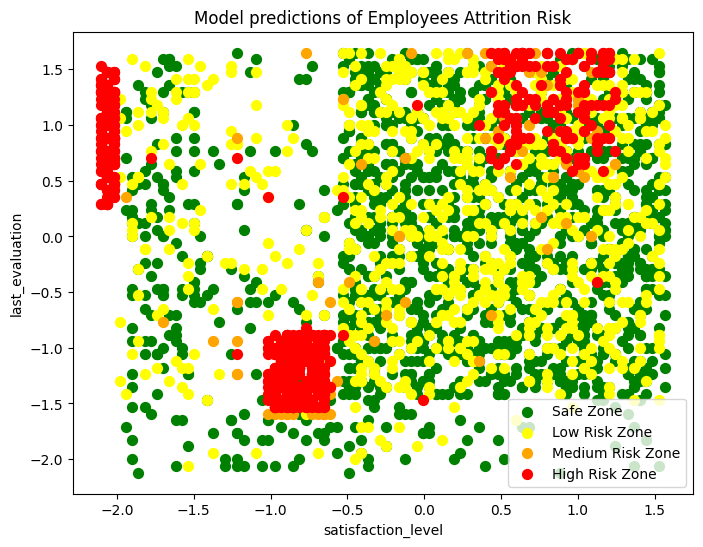

In [857]:
# Define colors for each risk zone
zones = {
    'Green':'Safe Zone',
    'Yellow':'Low Risk Zone',
    'Orange':'Medium Risk Zone',
    'Red':'High Risk Zone'
}

plt.figure(figsize=(8,6))

for zone in zones:
    zone_data = test_employees_df[test_employees_df['RiskZone']==zone]
    plt.scatter(zone_data['satisfaction_level'], zone_data['last_evaluation'], s=50, c=zone, label=zones[zone])
    

plt.title('Model predictions of Employees Attrition Risk')
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.legend()
plt.show()

### Visual comparison of distribution of employees who actually left the company based on those 2 features

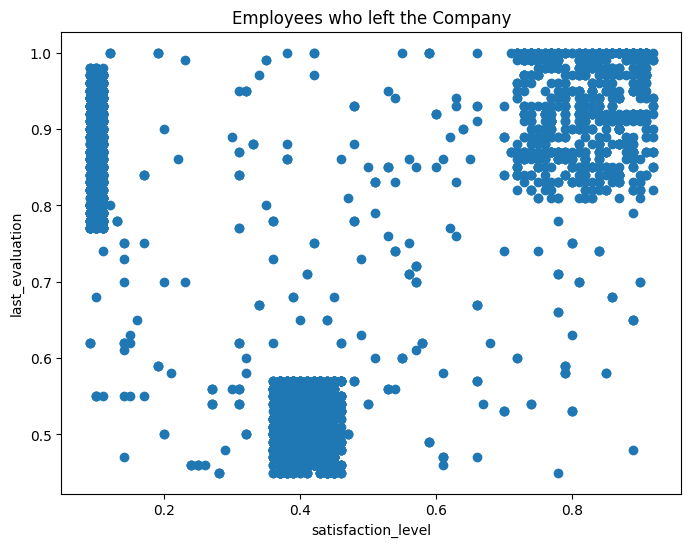

In [858]:
plt.figure(figsize=(8,6))
plt.scatter(x=employees_left['satisfaction_level'], y=employees_left['last_evaluation'])
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.title('Employees who left the Company')
plt.show()

The End